In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

sns.set(style="whitegrid")


In [ ]:
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

print("Dataset Preview:")
print(data.head())


Saving customer_churn.csv to customer_churn.csv
Dataset Preview:
   CustomerID  Age  Subscription_Length_Months  Watch_Time_Hours  \
0           1   56                          35         62.579266   
1           2   69                          15        159.714415   
2           3   46                          25         41.119547   
3           4   32                          28        183.961735   
4           5   60                          10         87.782848   

   Number_of_Logins Preferred_Content_Type Membership_Type Payment_Method  \
0                73               TV Shows           Basic         PayPal   
1                 1                 Sports           Basic    Credit Card   
2                36                 Movies         Premium         PayPal   
3                35                 Movies        Standard    Credit Card   
4                66                 Movies        Standard  Bank Transfer   

   Payment_Issues  Number_of_Complaints  Resolution_Time_Days  

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)
print("\nMissing values handled.")




Missing Values:
CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Preferred_Content_Type        0
Membership_Type               0
Payment_Method                0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Churn                         0
dtype: int64

Missing values handled.


<ipython-input-4-88a1ffac4e21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")
<ipython-input-4-88a1ffac4e21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")
<ipython-input-4-88a1ffac4e21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")
<ipython-input-4-88a1ffac4e21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  s

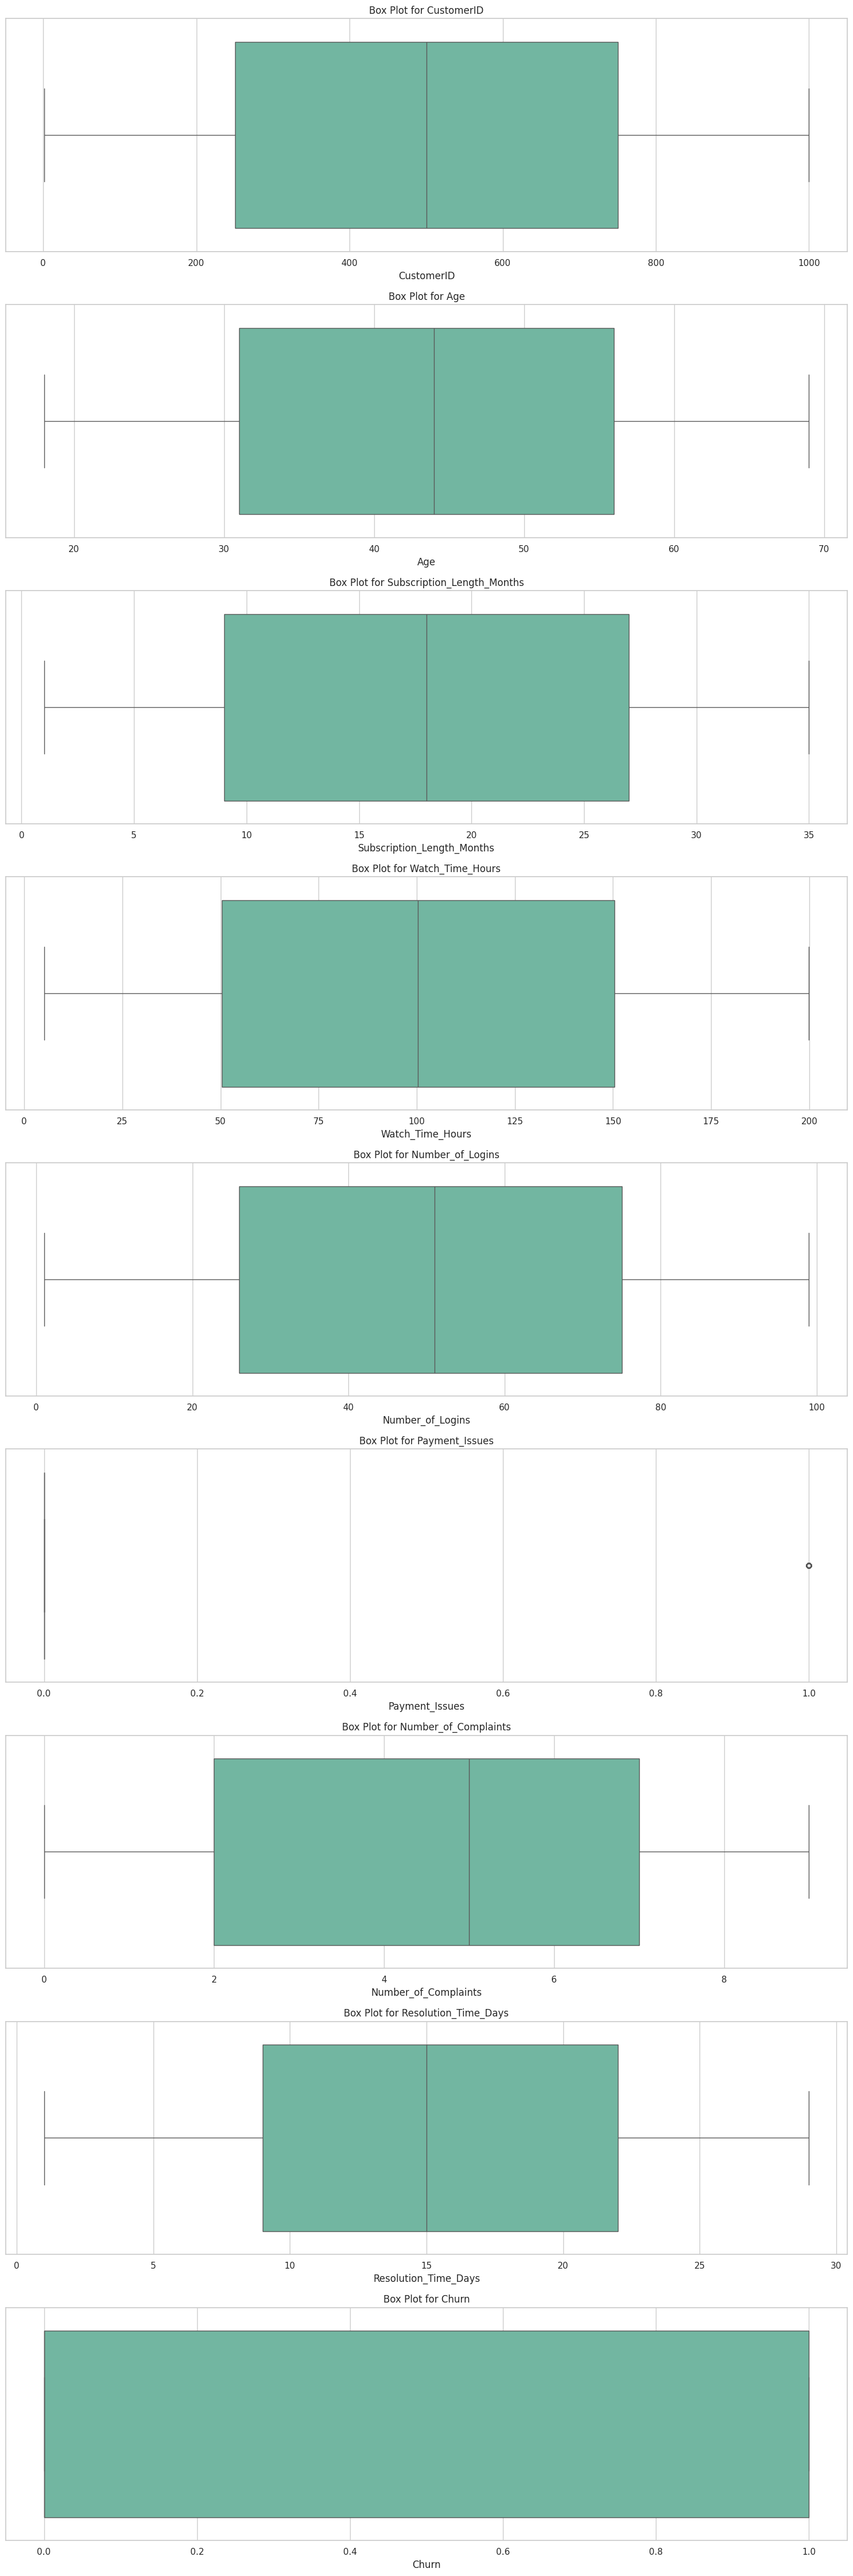

In [ ]:
# Box Plot for Each Numeric Feature
numeric_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 5 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=data[col], palette="Set2")
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()




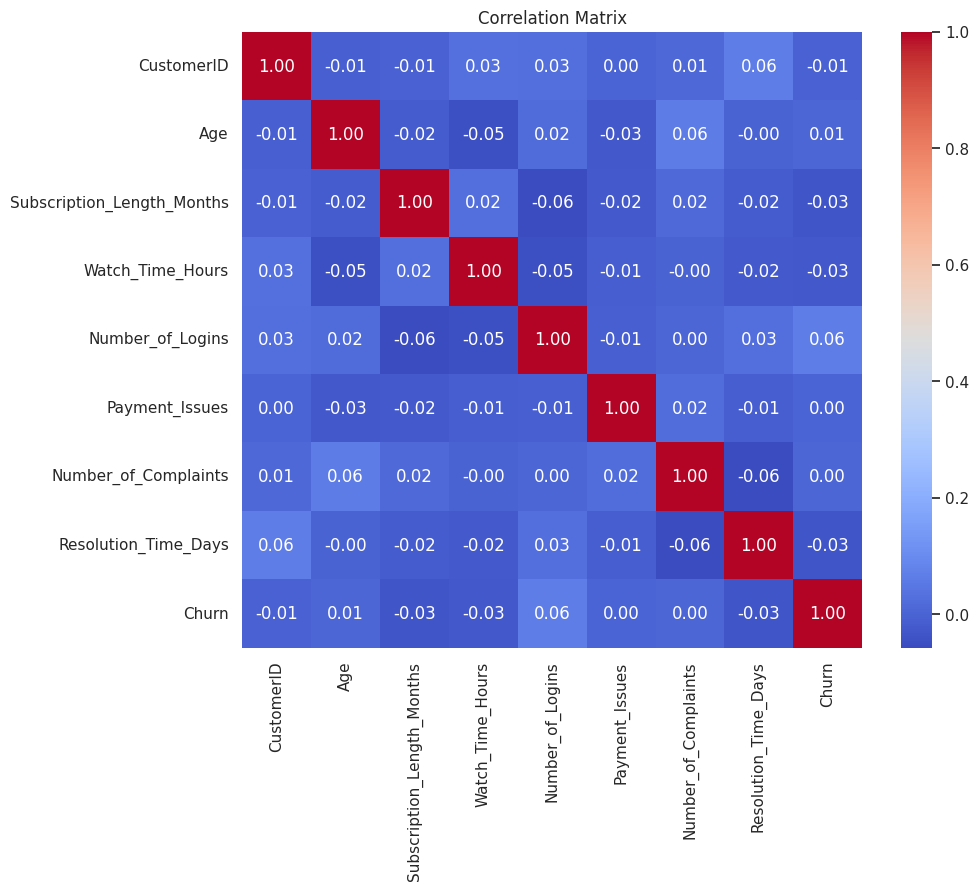

In [ ]:
# Correlation heatmap for numeric columns
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
print(data.columns)


Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Watch_Time_Hours',
       'Number_of_Logins', 'Preferred_Content_Type', 'Membership_Type',
       'Payment_Method', 'Payment_Issues', 'Number_of_Complaints',
       'Resolution_Time_Days', 'Churn'],
      dtype='object')


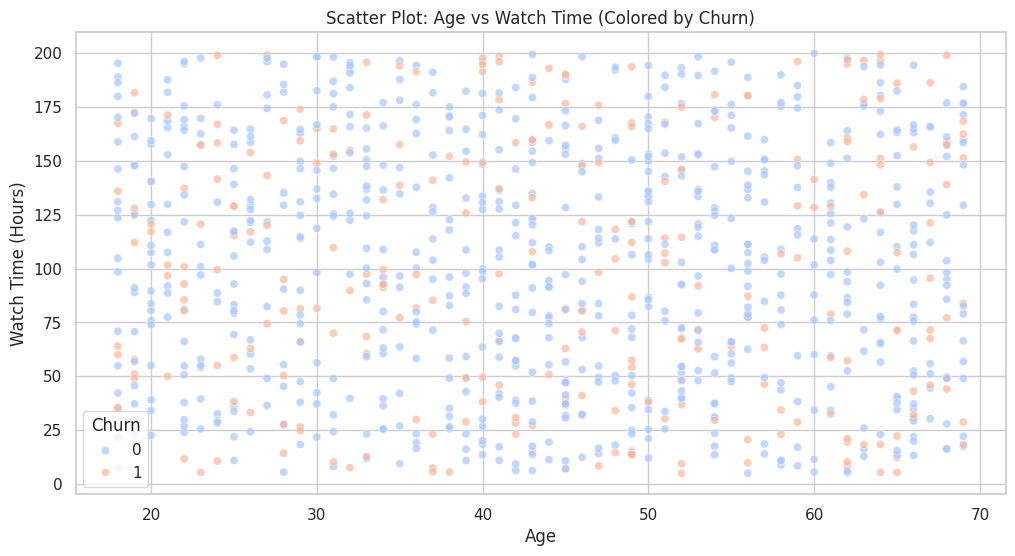

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Age', y='Watch_Time_Hours', hue='Churn', palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot: Age vs Watch Time (Colored by Churn)")
plt.xlabel("Age")
plt.ylabel("Watch Time (Hours)")
plt.legend(title="Churn")
plt.show()


In [ ]:
# Feature Encoding
data = pd.get_dummies(data, drop_first=True)  # Convert categorical variables into dummy/indicator variables

# Splitting the dataset into features and target
X = data.drop(columns=['Churn'])  # Replace 'Churn' with the correct column name for the target variable
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created successfully.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Training and testing sets created successfully.
X_train shape: (800, 15), X_test shape: (200, 15)



Decision Tree Metrics:
Accuracy: 0.59
Precision: 0.32
Recall: 0.32
F1 Score: 0.32

Confusion Matrix:
[[100  41]
 [ 40  19]]


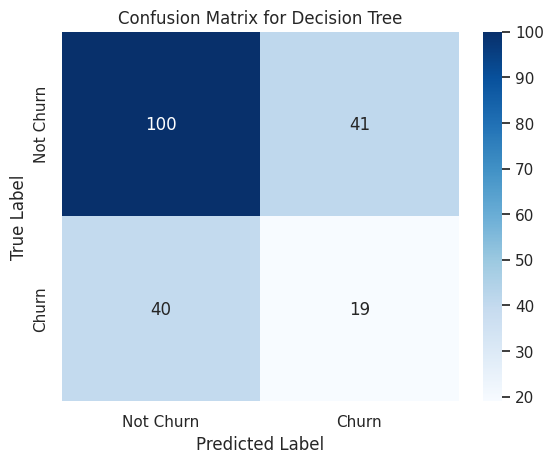

In [ ]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.2f}")

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


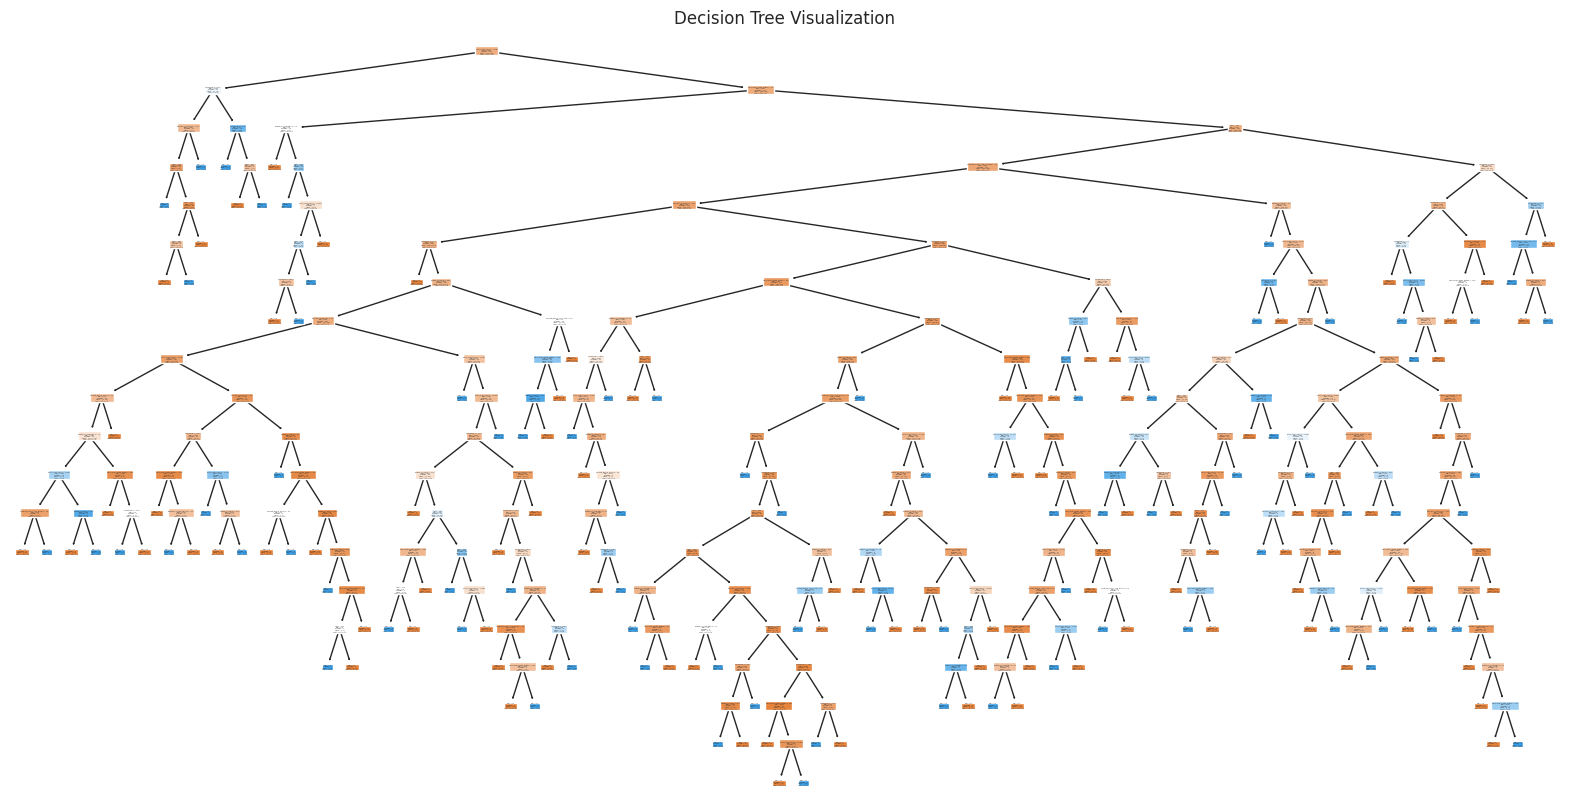

In [ ]:
# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()



Random Forest Metrics:
Accuracy: 0.68
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Confusion Matrix:
[[135   6]
 [ 59   0]]


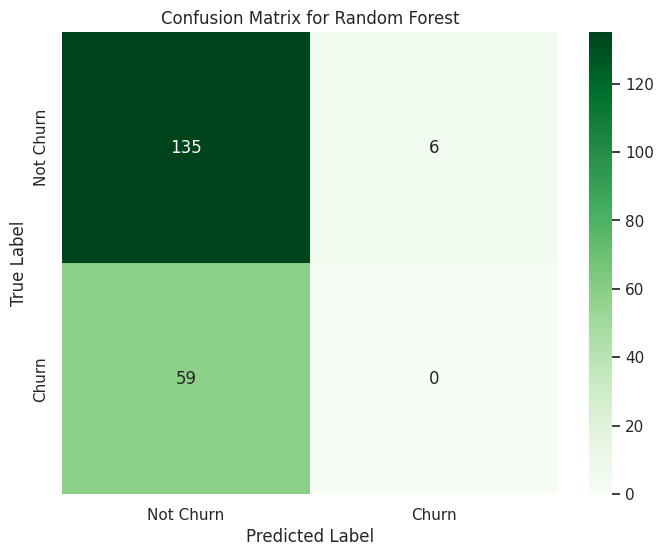

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Feature Importances:
                            Feature  Importance
3                  Watch_Time_Hours    0.150242
0                        CustomerID    0.145008
4                  Number_of_Logins    0.127953
1                               Age    0.126308
2        Subscription_Length_Months    0.118024
7              Resolution_Time_Days    0.111406
6              Number_of_Complaints    0.077545
13       Payment_Method_Credit Card    0.020339
12         Membership_Type_Standard    0.019991
10  Preferred_Content_Type_TV Shows    0.018927
11          Membership_Type_Premium    0.018852
9     Preferred_Content_Type_Sports    0.016861
14            Payment_Method_PayPal    0.016626
8     Preferred_Content_Type_Movies    0.016230
5                    Payment_Issues    0.015688


<ipython-input-18-a6a85a72355f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


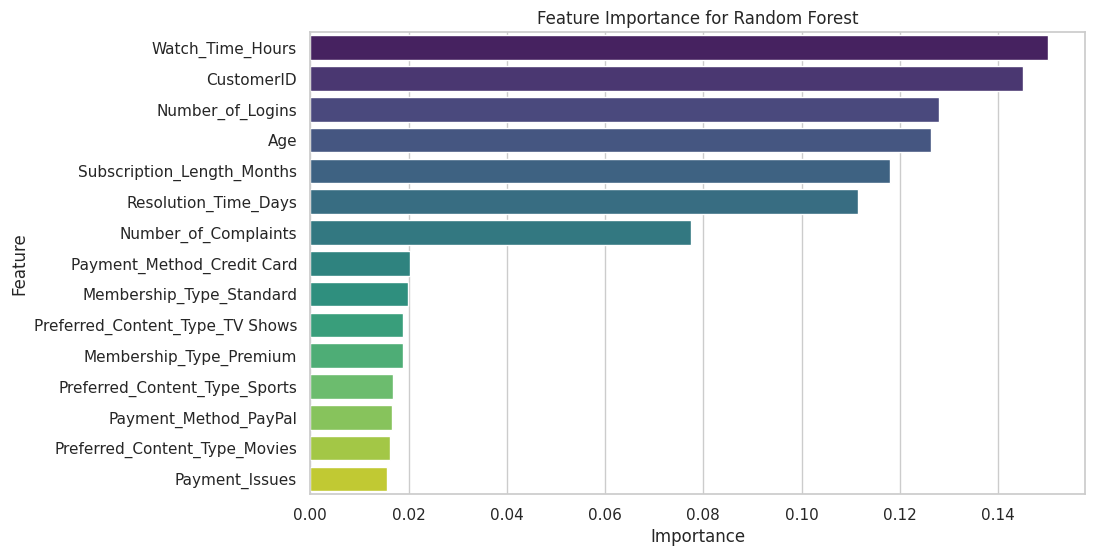

In [ ]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
